Chat GPT

1. Data Cleaning and Preprocessing:
Check for missing values, outliers, and inconsistencies.
Convert date column to a datetime format if it's not already.
Ensure consistency in team names and competition names (e.g., handle case sensitivity, remove leading/trailing spaces).
Verify data types and convert them if needed (e.g., goals should ideally be integers).

2. Basic Overview:
Check the dimensions of the dataset (shape attribute).
Display the first few rows (head()) to understand the structure and contents.
Summary statistics for numerical columns (describe()).

3. Temporal Analysis:
Explore trends over time: goals scored, matches played, etc.
Group data by year/month and analyze match frequencies, average goals, etc.
Plot time series to visualize these trends.

4. Team Performance:
Calculate and visualize win percentages, draw percentages, and loss percentages for each team.
Identify top-scoring teams, defensive teams, consistent performers, etc.

5. Competition Analysis:
Breakdown matches by competitions.
Analyze average goals per match for different competitions.
Compare the distribution of match outcomes (wins, draws, losses) across competitions.

6. Continent-wise Analysis:
Explore matches played across continents.
Analyze average goals, match outcomes, etc., for matches played in different continents.

7. Distribution of Goals:
Histograms or density plots for goals scored by home and away teams.
Investigate high-scoring matches, low-scoring matches, etc.

8. Match Outcomes:
Distribution of match outcomes (win/loss/draw) across the dataset.
Percentage of matches that go into extra time or penalties.

9. Correlation Analysis:
Check if there's a correlation between home/away goals and match outcomes.
Explore correlations between features like goals scored, competition type, etc.

10. Visualizations:
Utilize various plots: bar charts, pie charts, box plots, heatmaps, etc., to visually represent the data.
Geographical visualizations (world maps) to display match distributions by country/continent.

11. Hypothesis Testing (Optional):
If interested, conduct statistical tests to validate hypotheses (e.g., home advantage in scoring, differences between international and national competitions, etc.).

12. Interactive Dashboards (Optional):
Create interactive visualizations using libraries like Plotly or Bokeh for more user-friendly exploration.

13. Additional Tips:
Use libraries like Pandas, Matplotlib, Seaborn, Plotly for data manipulation, visualization, and analysis.
Break down the analysis into smaller, manageable chunks to gain deeper insights.
Document findings and insights throughout the process for easier reporting.

# World Football EDA

**Introduction**

The World Football EDA project aims to conduct a comprehensive Exploratory Data Analysis (EDA) on a rich collection of football match records. This dataset encompasses over a million matches worldwide, covering various competitions, national championships, and international events. The dataset offers a detailed perspective on matches, including team performances, match outcomes, goals scored, and competition details.

The dataset 'results' contains essential information about each match, including:

* **Team Information:** Home and away team names, countries, and identifications.
* **Match Details:** Date, goals scored by home and away teams, match duration (90 minutes, extra time, penalties), and competition names.
* **Geographical Information:** Country names, continents for home and away teams, and the continent of the competition.
* **Classification:** Differentiates between national and international levels of competition.

**Objective**

The primary objective of this project is to perform a thorough Exploratory Data Analysis to extract valuable insights and patterns from the football match dataset. By leveraging statistical analysis, visualizations, and trend exploration, this project aims to uncover trends, team performances, geographical distributions, and other significant aspects within the world of football matches.

**Methodology**

The project will follow a systematic approach involving data cleaning, exploratory analysis, statistical investigations, and visualizations using Python programming and relevant libraries such as Pandas, Matplotlib, Seaborn, and Plotly. Each step will contribute to unraveling the hidden facets within the dataset, providing valuable insights for football enthusiasts, analysts, and sports organizations.

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder path
folder_path = r'C:\GitHub\hmantovani\poisson\football\results'

# Get a list of all CSV files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file in file_list:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
results = pd.concat(data_frames, ignore_index=True)

## Data preprocessing

### Checking for null values

In [52]:
results.isnull().sum()

home                 0
away                 0
date                 0
gh                   0
ga                   0
full_time            0
competition          0
home_ident           0
away_ident           0
home_country         0
away_country         0
home_code         2016
away_code         2015
home_continent       0
away_continent       0
continent            0
level                0
dtype: int64

### Columns information

In [53]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078214 entries, 0 to 1078213
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   home            1078214 non-null  object
 1   away            1078214 non-null  object
 2   date            1078214 non-null  object
 3   gh              1078214 non-null  int64 
 4   ga              1078214 non-null  int64 
 5   full_time       1078214 non-null  object
 6   competition     1078214 non-null  object
 7   home_ident      1078214 non-null  object
 8   away_ident      1078214 non-null  object
 9   home_country    1078214 non-null  object
 10  away_country    1078214 non-null  object
 11  home_code       1076198 non-null  object
 12  away_code       1076199 non-null  object
 13  home_continent  1078214 non-null  object
 14  away_continent  1078214 non-null  object
 15  continent       1078214 non-null  object
 16  level           1078214 non-null  object
dtypes: int64

### Making the changes needed

In [54]:
# Convert date column to DateTime
results['date'] = pd.to_datetime(results['date'])

# Ensure consistency in team and competition names
results['home'] = results['home'].str.strip()
results['away'] = results['away'].str.strip()
results['competition'] = results['competition'].str.strip()

# Drop useless columns
results.drop(['home_code', 'away_code'], axis=1, inplace=True)

# Check the final shape
results.shape

(1078214, 15)

### Creating helper columns

In [55]:
results['gt'] = results['gh'] + results['ga']
results['home_res'] = np.where(results['gh'] > results['ga'], 'W', np.where(results['gh'] == results['ga'], 'D', 'L'))
results['away_res'] = np.where(results['ga'] > results['gh'], 'W', np.where(results['ga'] == results['gh'], 'D', 'L'))

### Head

In [56]:
results.head()

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_continent,away_continent,continent,level,gt,home_res,away_res
0,Seongnam FC,Osotspa Samut Prakan,2003-03-09,6,0,F,AFC CL,Seongnam FC (Korea Republic),Osotspa Samut Prakan (Thailand),korea-republic,thailand,Asia,Asia,Asia,international,6,W,L
1,Shimizu S Pulse,Dalian Shide,2003-03-09,0,0,F,AFC CL,Shimizu S Pulse (Japan),Dalian Shide (China Pr),japan,china-pr,Asia,Asia,Asia,international,0,D,D
2,Al Sadd,Esteghlal,2003-03-09,1,2,F,AFC CL,Al Sadd (Qatar),Esteghlal (Iran),qatar,iran,Asia,Asia,Asia,international,3,L,W
3,Al Ain FC,Al Hilal,2003-03-09,1,0,F,AFC CL,Al Ain FC (United Arab Emirates),Al Hilal (Saudi Arabia),united-arab-emirates,saudi-arabia,Asia,Asia,Asia,international,1,W,L
4,Nisa Asgabat,Pakhtakor Tashkent,2003-03-09,0,3,F,AFC CL,Nisa Asgabat (Turkmenistan),Pakhtakor Tashkent (Uzbekistan),turkmenistan,uzbekistan,Asia,Asia,Asia,international,3,L,W


### Describe

In [57]:
results.describe()

,gh,ga,gt
count,1.078214e+06,1.078214e+06,1.078214e+06
mean,1.634215e+00,1.145624e+00,2.779840e+00
std,1.453958e+00,1.211868e+00,1.867178e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,3.000000e+00
75%,2.000000e+00,2.000000e+00,4.000000e+00
max,2.500000e+01,2.400000e+01,3.900000e+01


## Time-series analysis

In [66]:
# Set 'date' column as the index for time-based analysis
by_date = results.copy()
by_date.set_index('date', inplace=True)

### Average goals per year

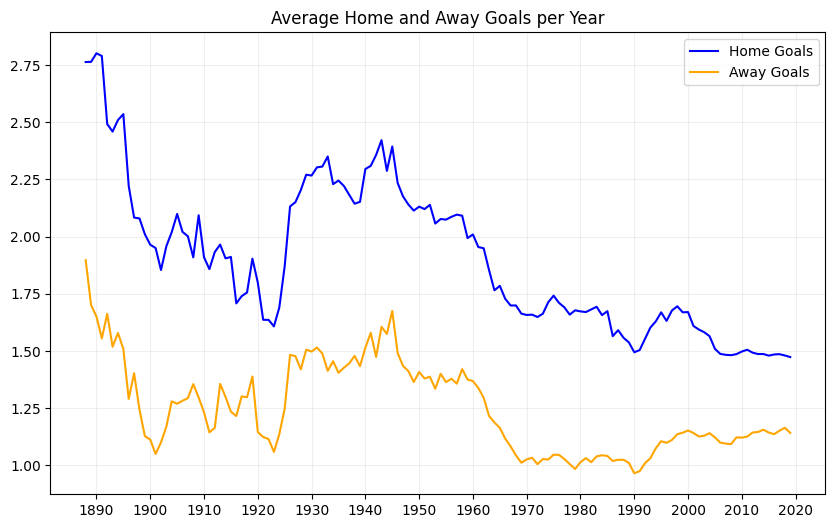

In [90]:
# Resample data by year to analyze trends
home_goals_per_year = by_date['gh'].resample('Y').sum()
away_goals_per_year = by_date['ga'].resample('Y').sum()
matches_per_year = by_date['gh'].resample('Y').count()

# Calculate average goals per match per year
avg_home_goals_per_match = home_goals_per_year / matches_per_year
avg_away_goals_per_match = away_goals_per_year / matches_per_year

plt.figure(figsize=(10, 6))

# Plot average home goals
plt.plot(avg_home_goals_per_match.index.year, avg_home_goals_per_match, linestyle='-', color='blue', label='Home Goals')

# Plot average away goals
plt.plot(avg_away_goals_per_match.index.year, avg_away_goals_per_match, linestyle='-', color='orange', label='Away Goals')

plt.title('Average Home and Away Goals per Year')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Set x-axis ticks from 1890 to 2020, incremented by 10 years
years = np.arange(1890, 2021, 10)
plt.xticks(years)

# Set grid lines opacity to 0.2
plt.grid(alpha=0.2)

plt.show()

### Number of matches per year

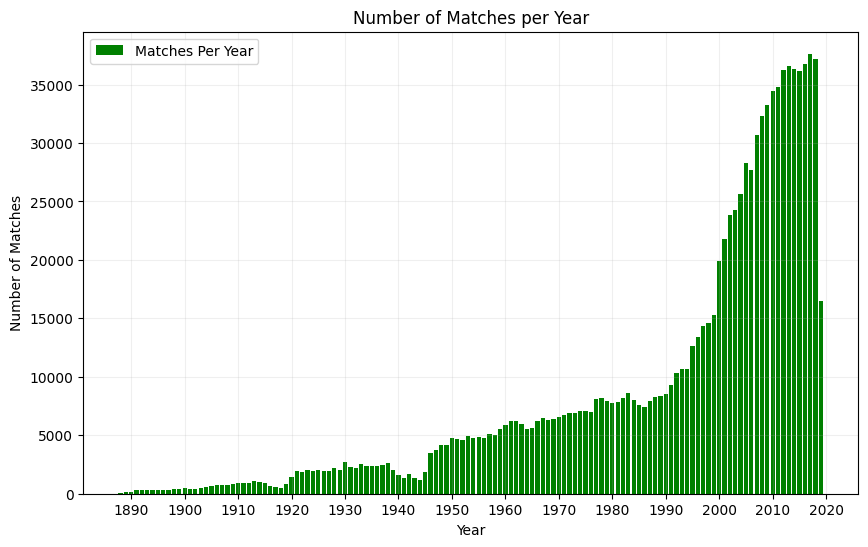

In [91]:
# Resample data by year to analyze trends
matches_per_year = by_date['gh'].resample('Y').count()

plt.figure(figsize=(10, 6))

# Plot number of matches per year
plt.bar(matches_per_year.index.year, matches_per_year, color='green', label='Matches Per Year')

plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.legend()

# Set x-axis ticks from 1890 to 2020, incremented by 10 years
years = np.arange(1890, 2021, 10)
plt.xticks(years)

# Set grid lines opacity to 0.2
plt.grid(alpha=0.2)

plt.show()

## Team performance

### Home

In [146]:
# Group by home_ident and count W, D, L
home_performance = results.groupby('home_ident')['home_res'].value_counts().unstack().fillna(0)

# Calculate Total Matches
home_total_matches = home_performance.sum(axis=1)

# Sum 'gh' as Goals Scored
home_goals_scored = results.groupby('home_ident')['gh'].sum()

# Sum 'ga' as Goals Conceded
home_goals_conceded = results.groupby('home_ident')['ga'].sum()

# Calculate Goal Difference
home_goal_difference = home_goals_scored - home_goals_conceded

# Calculating percentages
home_wins = home_performance['W']
home_draws = home_performance['D']
home_losses = home_performance['L']
home_points = home_performance['W'] * 3 + home_performance['D']

home_win_percentage = round((home_wins / home_total_matches) * 100, 1)
home_draws_percentage = round((home_draws / home_total_matches) * 100, 1)
home_losses_percentage = round((home_losses / home_total_matches) * 100, 1)
home_points_percentage = round((home_points / (home_total_matches*3)) * 100, 1)

# Create a DataFrame for home performance
home_performance_df = pd.DataFrame({
    'P': home_total_matches.astype(int),
    'PTS': home_points.astype(int),
    'W': home_performance['W'].astype(int),
    'D': home_performance['D'].astype(int),
    'L': home_performance['L'].astype(int),
    'GF': home_goals_scored,
    'GA': home_goals_conceded,
    'GD': home_goal_difference,
    'W%': home_win_percentage,
    'D%': home_draws_percentage,
    'L%': home_losses_percentage,
    'PTS%': home_points_percentage
})

# Resetting the index
home_performance_df.reset_index(inplace=True)

# Split 'home_ident' into 'Team' and 'Nation'
split_columns = home_performance_df['home_ident'].str.split(' \(', expand=True)
home_performance_df['Team'] = split_columns[0]
home_performance_df['Nation'] = split_columns[1].str.replace(r'\)', '', regex=True)

# Drop the 'home_ident' column
home_performance_df.drop('home_ident', axis=1, inplace=True)

# Reorder columns
home_performance_df = home_performance_df[['Team', 'Nation', 'P', 'PTS', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'W%', 'D%', 'L%', 'PTS%']]

# Adding dummy column
home_performance_df['Location'] = "Home"

home_performance_df.sort_values(by='PTS', ascending=False).head(10)

,Team,Nation,P,PTS,W,D,L,GF,GA,GD,W%,D%,L%,PTS%,Location
1621,Celtic FC,Scotland,2267,5175,1590,405,272,5542,1920,3622,70.1,17.9,12.0,76.1,Home
5608,Rangers FC,Scotland,2171,5028,1557,357,257,5305,1848,3457,71.7,16.4,11.8,77.2,Home
4254,Liverpool FC,England,2263,4671,1385,516,362,4643,2106,2537,61.2,22.8,16.0,68.8,Home
717,Arsenal FC,England,2219,4432,1299,535,385,4371,2161,2210,58.5,24.1,17.4,66.6,Home
2394,Everton FC,England,2304,4348,1263,559,482,4445,2523,1922,54.8,24.3,20.9,62.9,Home
4420,Manchester United,England,2076,4249,1258,475,343,4133,1948,2185,60.6,22.9,16.5,68.2,Home
5728,River Plate,Argentina,2032,4247,1263,458,311,4242,1978,2264,62.2,22.5,15.3,69.7,Home
5642,Real Madrid,Spain,1701,4166,1311,233,157,4575,1490,3085,77.1,13.7,9.2,81.6,Home
1220,Boca Juniors,Argentina,1965,4136,1234,434,297,4138,1882,2256,62.8,22.1,15.1,70.2,Home
2449,FC Barcelona,Spain,1702,4126,1290,256,156,4571,1437,3134,75.8,15.0,9.2,80.8,Home


### Away

In [145]:
# Group by away_ident and count W, D, L
away_performance = results.groupby('away_ident')['away_res'].value_counts().unstack().fillna(0)

# Calculate Total Matches
away_total_matches = away_performance.sum(axis=1)

# Sum 'gh' as Goals Scored
away_goals_scored = results.groupby('away_ident')['gh'].sum()

# Sum 'ga' as Goals Conceded
away_goals_conceded = results.groupby('away_ident')['ga'].sum()

# Calculate Goal Difference
away_goal_difference = away_goals_scored - away_goals_conceded

# Calculating percentages
away_wins = away_performance['W']
away_draws = away_performance['D']
away_losses = away_performance['L']
away_points = away_performance['W'] * 3 + away_performance['D']

away_win_percentage = round((away_wins / away_total_matches) * 100, 1)
away_draws_percentage = round((away_draws / away_total_matches) * 100, 1)
away_losses_percentage = round((away_losses / away_total_matches) * 100, 1)
away_points_percentage = round((away_points / (away_total_matches*3)) * 100, 1)

# Create a DataFrame for away performance
away_performance_df = pd.DataFrame({
    'P': away_total_matches.astype(int),
    'PTS': away_points.astype(int),
    'W': away_performance['W'].astype(int),
    'D': away_performance['D'].astype(int),
    'L': away_performance['L'].astype(int),
    'GF': away_goals_scored,
    'GA': away_goals_conceded,
    'GD': away_goal_difference,
    'W%': away_win_percentage,
    'D%': away_draws_percentage,
    'L%': away_losses_percentage,
    'PTS%': away_points_percentage
})

# Resetting the index
away_performance_df.reset_index(inplace=True)

# Split 'away_ident' into 'Team' and 'Nation'
split_columns = away_performance_df['away_ident'].str.split(' \(', expand=True)
away_performance_df['Team'] = split_columns[0]
away_performance_df['Nation'] = split_columns[1].str.replace(r'\)', '', regex=True)

# Drop the 'away_ident' column
away_performance_df.drop('away_ident', axis=1, inplace=True)

# Reorder columns
away_performance_df = away_performance_df[['Team', 'Nation', 'P', 'PTS', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'W%', 'D%', 'L%', 'PTS%']]

# Adding dummy column
away_performance_df['Location'] = "Away"

away_performance_df.sort_values(by='PTS', ascending=False).head(10)

,Team,Nation,P,PTS,W,D,L,GF,GA,GD,W%,D%,L%,PTS%,Location
1624,Celtic FC,Scotland,2266,4020,1180,480,606,2675,4195,-1520,52.1,21.2,26.7,59.1,Away
5620,Rangers FC,Scotland,2175,3953,1149,506,520,2529,4163,-1634,52.8,23.3,23.9,60.6,Away
5740,River Plate,Argentina,2028,3135,856,567,605,2542,3152,-610,42.2,28.0,29.8,51.5,Away
1224,Boca Juniors,Argentina,1955,2918,785,563,607,2438,2906,-468,40.2,28.8,31.0,49.8,Away
4263,Liverpool FC,England,2266,2906,767,605,894,3233,2926,307,33.8,26.7,39.5,42.7,Away
720,Arsenal FC,England,2223,2828,747,587,889,3353,3031,322,33.6,26.4,40.0,42.4,Away
4431,Manchester United,England,2078,2799,751,546,781,3224,3048,176,36.1,26.3,37.6,44.9,Away
3628,Independiente,Argentina,1919,2617,684,565,670,2591,2696,-105,35.6,29.4,34.9,45.5,Away
3840,Juventus,Italy,1696,2588,683,539,474,1837,2297,-460,40.3,31.8,27.9,50.9,Away
6296,Sl Benfica,Portugal,1405,2548,740,328,337,1572,2509,-937,52.7,23.3,24.0,60.5,Away


### Combined

In [159]:
performance_df = pd.concat([home_performance_df, away_performance_df])

performance_df = performance_df.groupby(['Team', 'Nation']).agg({
    'P': 'sum',
    'PTS': 'sum',
    'W': 'sum',
    'D': 'sum',
    'L': 'sum',
    'GF': 'sum',
    'GA': 'sum',
    'GD': 'sum'
}).reset_index()

performance_df['W%'] = round(performance_df['W'] / performance_df['P'] * 100, 1)
performance_df['D%'] = round(performance_df['D'] / performance_df['P'] * 100, 1)
performance_df['L%'] = round(performance_df['L'] / performance_df['P'] * 100, 1)
performance_df['PTS%'] = round((performance_df['W'] * 3 + performance_df['D']) / (performance_df['P'] * 3) * 100, 1)

performance_df.sort_values(by='PTS', ascending=False).head(10)

,Team,Nation,P,PTS,W,D,L,GF,GA,GD,W%,D%,L%,PTS%
1629,Celtic FC,Scotland,4533,9195,2770,885,878,8217,6115,2102,61.1,19.5,19.4,67.6
5635,Rangers FC,Scotland,4346,8981,2706,863,777,7834,6011,1823,62.3,19.9,17.9,68.9
4275,Liverpool FC,England,4529,7577,2152,1121,1256,7876,5032,2844,47.5,24.8,27.7,55.8
5755,River Plate,Argentina,4060,7382,2119,1025,916,6784,5130,1654,52.2,25.2,22.6,60.6
720,Arsenal FC,England,4442,7260,2046,1122,1274,7724,5192,2532,46.1,25.3,28.7,54.5
1228,Boca Juniors,Argentina,3920,7054,2019,997,904,6576,4788,1788,51.5,25.4,23.1,60.0
4443,Manchester United,England,4154,7048,2009,1021,1124,7357,4996,2361,48.4,24.6,27.1,56.6
2405,Everton FC,England,4608,6805,1884,1153,1571,8274,5252,3022,40.9,25.0,34.1,49.2
5669,Real Madrid,Spain,3388,6707,2015,662,711,6913,4202,2711,59.5,19.5,21.0,66.0
2461,FC Barcelona,Spain,3403,6573,1957,702,744,6887,4087,2800,57.5,20.6,21.9,64.4


### Minimum 500 games

In [167]:
min_500_games = performance_df[performance_df.P >= 500]
min_500_games.sort_values(by='PTS', ascending=False).head(25)

,Team,Nation,P,PTS,W,D,L,GF,GA,GD,W%,D%,L%,PTS%
1629,Celtic FC,Scotland,4533,9195,2770,885,878,8217,6115,2102,61.1,19.5,19.4,67.6
5635,Rangers FC,Scotland,4346,8981,2706,863,777,7834,6011,1823,62.3,19.9,17.9,68.9
4275,Liverpool FC,England,4529,7577,2152,1121,1256,7876,5032,2844,47.5,24.8,27.7,55.8
5755,River Plate,Argentina,4060,7382,2119,1025,916,6784,5130,1654,52.2,25.2,22.6,60.6
720,Arsenal FC,England,4442,7260,2046,1122,1274,7724,5192,2532,46.1,25.3,28.7,54.5
1228,Boca Juniors,Argentina,3920,7054,2019,997,904,6576,4788,1788,51.5,25.4,23.1,60.0
4443,Manchester United,England,4154,7048,2009,1021,1124,7357,4996,2361,48.4,24.6,27.1,56.6
2405,Everton FC,England,4608,6805,1884,1153,1571,8274,5252,3022,40.9,25.0,34.1,49.2
5669,Real Madrid,Spain,3388,6707,2015,662,711,6913,4202,2711,59.5,19.5,21.0,66.0
2461,FC Barcelona,Spain,3403,6573,1957,702,744,6887,4087,2800,57.5,20.6,21.9,64.4
